In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.image as img
from matplotlib import pyplot as plt
from sklearn.metrics import r2_score, mean_absolute_error
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold, cross_val_score



In [2]:
def print_preds(true_values_train, pred_values_train):
    print('Train:\t' + 'R2(r2_score) = ' + str(round(r2_score(true_values_train, pred_values_train), 3)) +
          '\tMAE = ' + str(round(mean_absolute_error(true_values_train, pred_values_train), 3))
         )

Загружаю csv файлы

In [3]:
TRAIN_DATASET_PATH = 'train.csv'
TEST_DATASET_PATH = 'test.csv'

In [4]:
df_train = pd.read_csv(TRAIN_DATASET_PATH)
df_train.head()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
0,14038,35,2.0,47.981561,29.442751,6.0,7,9.0,1969,0.089040,B,B,33,7976,5,NaN,0,11,B,184966.930730
1,15053,41,3.0,65.683640,40.049543,8.0,7,9.0,1978,0.000070,B,B,46,10309,1,240.0,1,16,B,300009.450063
2,4765,53,2.0,44.947953,29.197612,0.0,8,12.0,1968,0.049637,B,B,34,7759,0,229.0,1,3,B,220925.908524
3,5809,58,2.0,53.352981,52.731512,9.0,8,17.0,1977,0.437885,B,B,23,5735,3,1084.0,0,5,B,175616.227217
4,10783,99,1.0,39.649192,23.776169,7.0,11,12.0,1976,0.012339,B,B,35,5776,1,2078.0,2,4,B,150226.531644


In [5]:
df_test = pd.read_csv(TEST_DATASET_PATH)
df_test.head(10)

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2
0,725,58,2.0,49.882643,33.432782,6.0,6,14.0,1972,0.310199,B,B,11,2748,1,NaN,0,0,B
1,15856,74,2.0,69.263183,NaN,1.0,6,1.0,1977,0.075779,B,B,6,1437,3,NaN,0,2,B
2,5480,190,1.0,13.597819,15.948246,12.0,2,5.0,1909,0.000000,B,B,30,7538,87,4702.0,5,5,B
3,15664,47,2.0,73.046609,51.940842,9.0,22,22.0,2007,0.101872,B,B,23,4583,3,NaN,3,3,B
4,14275,27,1.0,47.527111,43.387569,1.0,17,17.0,2017,0.072158,B,B,2,629,1,NaN,0,0,A
5,7633,53,1.0,40.675627,NaN,1.0,21,21.0,1977,0.049637,B,B,34,7759,0,229.0,1,3,B
6,13329,23,2.0,68.099538,64.843025,1.0,2,17.0,1977,0.075779,B,B,6,1437,3,NaN,0,2,B
7,5502,32,2.0,48.193897,32.857644,6.0,5,14.0,1972,0.135650,B,B,46,7960,6,350.0,3,11,B
8,4220,96,3.0,72.277106,45.968758,9.0,17,17.0,1997,0.041116,B,B,53,14892,4,NaN,1,4,B
9,11538,6,3.0,80.219400,47.660260,9.0,13,17.0,2014,0.243205,B,B,5,1564,0,540.0,0,0,B


In [6]:
df_train.shape

(10000, 20)

In [7]:
df_test.shape

(5000, 19)

смотрю пропущенные значения

In [8]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             10000 non-null  int64  
 1   DistrictId     10000 non-null  int64  
 2   Rooms          10000 non-null  float64
 3   Square         10000 non-null  float64
 4   LifeSquare     7887 non-null   float64
 5   KitchenSquare  10000 non-null  float64
 6   Floor          10000 non-null  int64  
 7   HouseFloor     10000 non-null  float64
 8   HouseYear      10000 non-null  int64  
 9   Ecology_1      10000 non-null  float64
 10  Ecology_2      10000 non-null  object 
 11  Ecology_3      10000 non-null  object 
 12  Social_1       10000 non-null  int64  
 13  Social_2       10000 non-null  int64  
 14  Social_3       10000 non-null  int64  
 15  Healthcare_1   5202 non-null   float64
 16  Helthcare_2    10000 non-null  int64  
 17  Shops_1        10000 non-null  int64  
 18  Shops_2

удаление пропусков, замена пропусков медианой

In [9]:
len(df_train) - df_train.count()

Id                  0
DistrictId          0
Rooms               0
Square              0
LifeSquare       2113
KitchenSquare       0
Floor               0
HouseFloor          0
HouseYear           0
Ecology_1           0
Ecology_2           0
Ecology_3           0
Social_1            0
Social_2            0
Social_3            0
Healthcare_1     4798
Helthcare_2         0
Shops_1             0
Shops_2             0
Price               0
dtype: int64

In [10]:
df_train['LifeSquare'].fillna(df_train['LifeSquare'].median(), inplace=True)

In [11]:
df_train['Healthcare_1'].fillna(df_train['Healthcare_1'].median(), inplace=True)

In [12]:
len(df_test) - df_test.count()

Id                  0
DistrictId          0
Rooms               0
Square              0
LifeSquare       1041
KitchenSquare       0
Floor               0
HouseFloor          0
HouseYear           0
Ecology_1           0
Ecology_2           0
Ecology_3           0
Social_1            0
Social_2            0
Social_3            0
Healthcare_1     2377
Helthcare_2         0
Shops_1             0
Shops_2             0
dtype: int64

ищу текстовые данные и меняю на цифровые значения

In [13]:
df_train.describe(include='object')

,Ecology_2,Ecology_3,Shops_2
count,10000,10000,10000
unique,2,2,2
top,B,B,B
freq,9903,9725,9175


In [14]:
df_train['Ecology_2'].value_counts()

B    9903
A      97
Name: Ecology_2, dtype: int64

In [15]:
ec_2 = pd.get_dummies(df_train['Ecology_2'])
ec_2

,A,B
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1
...,...,...
9995,0,1
9996,0,1
9997,0,1
9998,0,1


In [16]:
df_train[ec_2.columns] = ec_2
df_train.head()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,...,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price,A,B
0,14038,35,2.0,47.981561,29.442751,6.0,7,9.0,1969,0.089040,...,33,7976,5,900.0,0,11,B,184966.930730,0,1
1,15053,41,3.0,65.683640,40.049543,8.0,7,9.0,1978,0.000070,...,46,10309,1,240.0,1,16,B,300009.450063,0,1
2,4765,53,2.0,44.947953,29.197612,0.0,8,12.0,1968,0.049637,...,34,7759,0,229.0,1,3,B,220925.908524,0,1
3,5809,58,2.0,53.352981,52.731512,9.0,8,17.0,1977,0.437885,...,23,5735,3,1084.0,0,5,B,175616.227217,0,1
4,10783,99,1.0,39.649192,23.776169,7.0,11,12.0,1976,0.012339,...,35,5776,1,2078.0,2,4,B,150226.531644,0,1


In [17]:
df_train.rename(columns={'A':'Ecology_2_A','B': 'Ecology_2_B'}, inplace=True)
df_train.head()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,...,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price,Ecology_2_A,Ecology_2_B
0,14038,35,2.0,47.981561,29.442751,6.0,7,9.0,1969,0.089040,...,33,7976,5,900.0,0,11,B,184966.930730,0,1
1,15053,41,3.0,65.683640,40.049543,8.0,7,9.0,1978,0.000070,...,46,10309,1,240.0,1,16,B,300009.450063,0,1
2,4765,53,2.0,44.947953,29.197612,0.0,8,12.0,1968,0.049637,...,34,7759,0,229.0,1,3,B,220925.908524,0,1
3,5809,58,2.0,53.352981,52.731512,9.0,8,17.0,1977,0.437885,...,23,5735,3,1084.0,0,5,B,175616.227217,0,1
4,10783,99,1.0,39.649192,23.776169,7.0,11,12.0,1976,0.012339,...,35,5776,1,2078.0,2,4,B,150226.531644,0,1


In [18]:
ec_3 = pd.get_dummies(df_train['Ecology_3'])
ec_3

,A,B
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1
...,...,...
9995,0,1
9996,0,1
9997,0,1
9998,1,0


In [19]:
df_train[ec_3.columns] = ec_3
df_train.head()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,...,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price,Ecology_2_A,Ecology_2_B,A,B
0,14038,35,2.0,47.981561,29.442751,6.0,7,9.0,1969,0.089040,...,5,900.0,0,11,B,184966.930730,0,1,0,1
1,15053,41,3.0,65.683640,40.049543,8.0,7,9.0,1978,0.000070,...,1,240.0,1,16,B,300009.450063,0,1,0,1
2,4765,53,2.0,44.947953,29.197612,0.0,8,12.0,1968,0.049637,...,0,229.0,1,3,B,220925.908524,0,1,0,1
3,5809,58,2.0,53.352981,52.731512,9.0,8,17.0,1977,0.437885,...,3,1084.0,0,5,B,175616.227217,0,1,0,1
4,10783,99,1.0,39.649192,23.776169,7.0,11,12.0,1976,0.012339,...,1,2078.0,2,4,B,150226.531644,0,1,0,1


In [20]:
df_train.rename(columns={'A':'Ecology_3_A','B': 'Ecology_3_B'}, inplace=True)
df_train.head()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,...,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price,Ecology_2_A,Ecology_2_B,Ecology_3_A,Ecology_3_B
0,14038,35,2.0,47.981561,29.442751,6.0,7,9.0,1969,0.089040,...,5,900.0,0,11,B,184966.930730,0,1,0,1
1,15053,41,3.0,65.683640,40.049543,8.0,7,9.0,1978,0.000070,...,1,240.0,1,16,B,300009.450063,0,1,0,1
2,4765,53,2.0,44.947953,29.197612,0.0,8,12.0,1968,0.049637,...,0,229.0,1,3,B,220925.908524,0,1,0,1
3,5809,58,2.0,53.352981,52.731512,9.0,8,17.0,1977,0.437885,...,3,1084.0,0,5,B,175616.227217,0,1,0,1
4,10783,99,1.0,39.649192,23.776169,7.0,11,12.0,1976,0.012339,...,1,2078.0,2,4,B,150226.531644,0,1,0,1


In [21]:
df_train['Shops_2'].value_counts()

B    9175
A     825
Name: Shops_2, dtype: int64

In [22]:
sh_2 = pd.get_dummies(df_train['Shops_2'])
sh_2

,A,B
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1
...,...,...
9995,0,1
9996,1,0
9997,1,0
9998,0,1


In [23]:
df_train[sh_2.columns] = sh_2
df_train.head()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,...,Helthcare_2,Shops_1,Shops_2,Price,Ecology_2_A,Ecology_2_B,Ecology_3_A,Ecology_3_B,A,B
0,14038,35,2.0,47.981561,29.442751,6.0,7,9.0,1969,0.089040,...,0,11,B,184966.930730,0,1,0,1,0,1
1,15053,41,3.0,65.683640,40.049543,8.0,7,9.0,1978,0.000070,...,1,16,B,300009.450063,0,1,0,1,0,1
2,4765,53,2.0,44.947953,29.197612,0.0,8,12.0,1968,0.049637,...,1,3,B,220925.908524,0,1,0,1,0,1
3,5809,58,2.0,53.352981,52.731512,9.0,8,17.0,1977,0.437885,...,0,5,B,175616.227217,0,1,0,1,0,1
4,10783,99,1.0,39.649192,23.776169,7.0,11,12.0,1976,0.012339,...,2,4,B,150226.531644,0,1,0,1,0,1


In [24]:
df_train.rename(columns={'A':'Shops_2_A','B': 'Shops_2_B'}, inplace=True)
df_train.head()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,...,Helthcare_2,Shops_1,Shops_2,Price,Ecology_2_A,Ecology_2_B,Ecology_3_A,Ecology_3_B,Shops_2_A,Shops_2_B
0,14038,35,2.0,47.981561,29.442751,6.0,7,9.0,1969,0.089040,...,0,11,B,184966.930730,0,1,0,1,0,1
1,15053,41,3.0,65.683640,40.049543,8.0,7,9.0,1978,0.000070,...,1,16,B,300009.450063,0,1,0,1,0,1
2,4765,53,2.0,44.947953,29.197612,0.0,8,12.0,1968,0.049637,...,1,3,B,220925.908524,0,1,0,1,0,1
3,5809,58,2.0,53.352981,52.731512,9.0,8,17.0,1977,0.437885,...,0,5,B,175616.227217,0,1,0,1,0,1
4,10783,99,1.0,39.649192,23.776169,7.0,11,12.0,1976,0.012339,...,2,4,B,150226.531644,0,1,0,1,0,1


смотрю зависимость от цены

In [25]:
df_train.corr()['Price']

Id               0.009880
DistrictId       0.265100
Rooms            0.550291
Square           0.520075
LifeSquare       0.078331
KitchenSquare    0.028864
Floor            0.128715
HouseFloor       0.088280
HouseYear        0.004305
Ecology_1       -0.058381
Social_1         0.263286
Social_2         0.239226
Social_3         0.074878
Healthcare_1     0.128059
Helthcare_2      0.253090
Shops_1          0.180876
Price            1.000000
Ecology_2_A     -0.022379
Ecology_2_B      0.022379
Ecology_3_A      0.052585
Ecology_3_B     -0.052585
Shops_2_A       -0.070388
Shops_2_B        0.070388
Name: Price, dtype: float64

Text(0.5, 0.98, 'Distribution of Price')

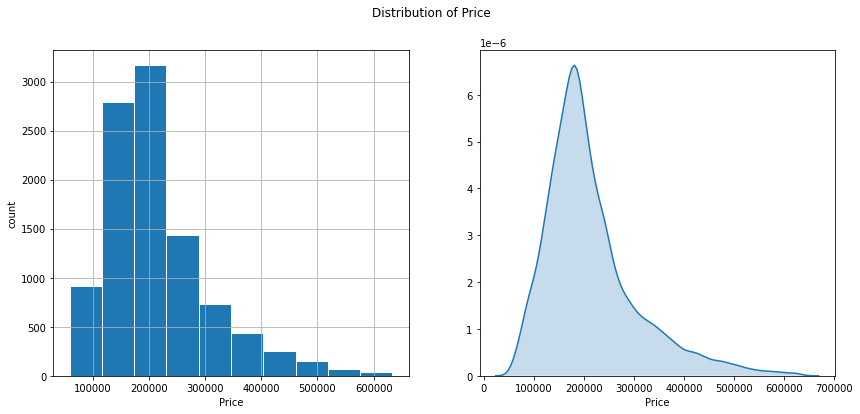

In [26]:
plt.figure(figsize = (14, 6))

plt.subplot(121)
df_train['Price'].hist(edgecolor = 'white')
plt.ylabel('count')
plt.xlabel('Price')

plt.subplot(122)
sns.kdeplot(df_train['Price'], shade = True, legend = False)
plt.xlabel('Price')

plt.suptitle('Distribution of Price')

по графикам видно, что они не симметричные(скошенные)

найдем моду, медиану и среднее значение и посмотрим на графике

In [27]:
target_mean = round(df_train['Price'].mean(), 2)
target_median = df_train['Price'].median()
target_mode = df_train['Price'].mode()[0]

target_mode, target_median, target_mean

(59174.77802758122, 192269.64487934904, 214138.86)

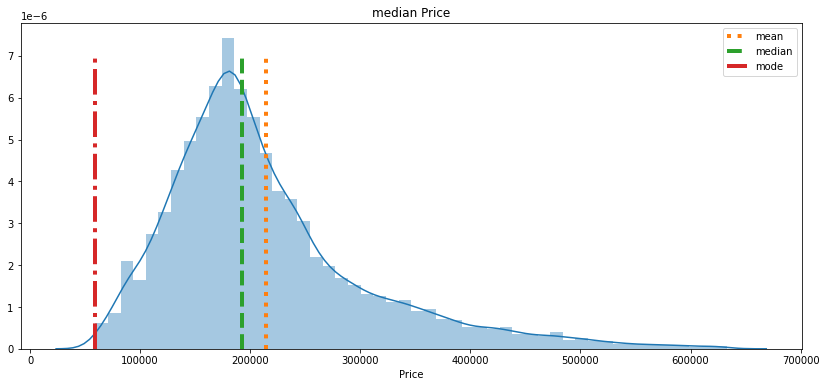

In [28]:
plt.figure(figsize = (14, 6))

sns.distplot(df_train['Price'])

y = np.linspace(0, 0.000007, 100)
plt.plot([target_mean] * 100, y, label = 'mean', linestyle =':', linewidth = 4)
plt.plot([target_median] * 100, y, label = 'median', linestyle ='--', linewidth = 4)
plt.plot([target_mode] * 100, y, label = 'mode', linestyle ='-.', linewidth = 4)

plt.title('median Price')
plt.legend();

убираю пустые значения в таблице тест

In [29]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             5000 non-null   int64  
 1   DistrictId     5000 non-null   int64  
 2   Rooms          5000 non-null   float64
 3   Square         5000 non-null   float64
 4   LifeSquare     3959 non-null   float64
 5   KitchenSquare  5000 non-null   float64
 6   Floor          5000 non-null   int64  
 7   HouseFloor     5000 non-null   float64
 8   HouseYear      5000 non-null   int64  
 9   Ecology_1      5000 non-null   float64
 10  Ecology_2      5000 non-null   object 
 11  Ecology_3      5000 non-null   object 
 12  Social_1       5000 non-null   int64  
 13  Social_2       5000 non-null   int64  
 14  Social_3       5000 non-null   int64  
 15  Healthcare_1   2623 non-null   float64
 16  Helthcare_2    5000 non-null   int64  
 17  Shops_1        5000 non-null   int64  
 18  Shops_2 

In [30]:
df_test['LifeSquare'].fillna(df_train['LifeSquare'].median(), inplace=True)
df_test['Healthcare_1'].fillna(df_train['Healthcare_1'].median(), inplace=True)

In [31]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             5000 non-null   int64  
 1   DistrictId     5000 non-null   int64  
 2   Rooms          5000 non-null   float64
 3   Square         5000 non-null   float64
 4   LifeSquare     5000 non-null   float64
 5   KitchenSquare  5000 non-null   float64
 6   Floor          5000 non-null   int64  
 7   HouseFloor     5000 non-null   float64
 8   HouseYear      5000 non-null   int64  
 9   Ecology_1      5000 non-null   float64
 10  Ecology_2      5000 non-null   object 
 11  Ecology_3      5000 non-null   object 
 12  Social_1       5000 non-null   int64  
 13  Social_2       5000 non-null   int64  
 14  Social_3       5000 non-null   int64  
 15  Healthcare_1   5000 non-null   float64
 16  Helthcare_2    5000 non-null   int64  
 17  Shops_1        5000 non-null   int64  
 18  Shops_2 

ищу значения типа объект и меняю их на цифровые

In [32]:
df_test.describe(include='object')

,Ecology_2,Ecology_3,Shops_2
count,5000,5000,5000
unique,2,2,2
top,B,B,B
freq,4952,4851,4588


In [33]:
df_test['Ecology_2'].value_counts()

B    4952
A      48
Name: Ecology_2, dtype: int64

In [34]:
ec_2 = pd.get_dummies(df_test['Ecology_2'])
df_test[ec_2.columns] = ec_2
df_test.rename(columns={'A':'Ecology_2_A','B': 'Ecology_2_B'}, inplace=True)
df_test.head()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,...,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Ecology_2_A,Ecology_2_B
0,725,58,2.0,49.882643,33.432782,6.0,6,14.0,1972,0.310199,...,B,11,2748,1,900.0,0,0,B,0,1
1,15856,74,2.0,69.263183,32.781260,1.0,6,1.0,1977,0.075779,...,B,6,1437,3,900.0,0,2,B,0,1
2,5480,190,1.0,13.597819,15.948246,12.0,2,5.0,1909,0.000000,...,B,30,7538,87,4702.0,5,5,B,0,1
3,15664,47,2.0,73.046609,51.940842,9.0,22,22.0,2007,0.101872,...,B,23,4583,3,900.0,3,3,B,0,1
4,14275,27,1.0,47.527111,43.387569,1.0,17,17.0,2017,0.072158,...,B,2,629,1,900.0,0,0,A,0,1


In [35]:
ec_3 = pd.get_dummies(df_test['Ecology_3'])
df_test[ec_3.columns] = ec_3
df_test.rename(columns={'A':'Ecology_3_A','B': 'Ecology_3_B'}, inplace=True)
df_test.head()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,...,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Ecology_2_A,Ecology_2_B,Ecology_3_A,Ecology_3_B
0,725,58,2.0,49.882643,33.432782,6.0,6,14.0,1972,0.310199,...,2748,1,900.0,0,0,B,0,1,0,1
1,15856,74,2.0,69.263183,32.781260,1.0,6,1.0,1977,0.075779,...,1437,3,900.0,0,2,B,0,1,0,1
2,5480,190,1.0,13.597819,15.948246,12.0,2,5.0,1909,0.000000,...,7538,87,4702.0,5,5,B,0,1,0,1
3,15664,47,2.0,73.046609,51.940842,9.0,22,22.0,2007,0.101872,...,4583,3,900.0,3,3,B,0,1,0,1
4,14275,27,1.0,47.527111,43.387569,1.0,17,17.0,2017,0.072158,...,629,1,900.0,0,0,A,0,1,0,1


In [36]:
sh_2 = pd.get_dummies(df_test['Shops_2'])
df_test[sh_2.columns] = sh_2
df_test.rename(columns={'A':'Shops_2_A','B': 'Shops_2_B'}, inplace=True)
df_test.head()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,...,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Ecology_2_A,Ecology_2_B,Ecology_3_A,Ecology_3_B,Shops_2_A,Shops_2_B
0,725,58,2.0,49.882643,33.432782,6.0,6,14.0,1972,0.310199,...,900.0,0,0,B,0,1,0,1,0,1
1,15856,74,2.0,69.263183,32.781260,1.0,6,1.0,1977,0.075779,...,900.0,0,2,B,0,1,0,1,0,1
2,5480,190,1.0,13.597819,15.948246,12.0,2,5.0,1909,0.000000,...,4702.0,5,5,B,0,1,0,1,0,1
3,15664,47,2.0,73.046609,51.940842,9.0,22,22.0,2007,0.101872,...,900.0,3,3,B,0,1,0,1,0,1
4,14275,27,1.0,47.527111,43.387569,1.0,17,17.0,2017,0.072158,...,900.0,0,0,A,0,1,0,1,1,0


буду искать выбросы и менять или удалять их

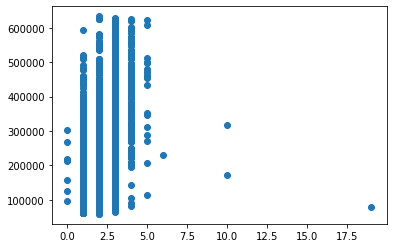

In [37]:
plt.scatter(df_train['Rooms'], df_train['Price'])

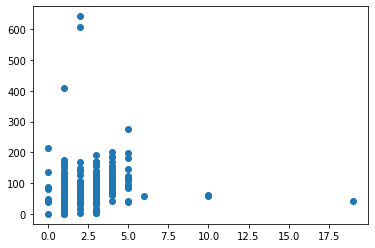

In [38]:
plt.scatter(df_train['Rooms'], df_train['Square'])

In [39]:
df_train.loc[(df_train['Rooms'] > 5) | (df_train['Rooms'] == 0), 'Rooms'] = df_train['Rooms'].median()
df_test.loc[(df_test['Rooms'] > 6) | (df_test['Rooms'] == 0), 'Rooms'] = df_train['Rooms'].median()

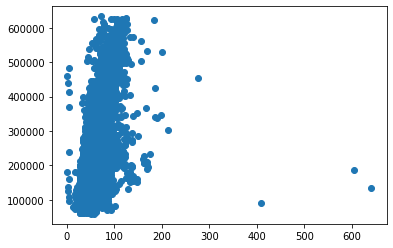

In [40]:
plt.scatter(df_train['Square'], df_train['Price'])

In [41]:
df_train.loc[(df_train['Square'] > 300) | (df_train['Square'] < 5), 'Square'] = df_train['Square'].median()
df_test.loc[(df_test['Square'] > 300) | (df_test['Square'] < 5), 'Square'] = df_train['Square'].median()

In [42]:
df_train.loc[(df_train['LifeSquare'] > df_train['Square']), 'LifeSquare'] = df_train['LifeSquare'].median()
df_test.loc[(df_test['LifeSquare'] > df_test['Square']), 'LifeSquare'] = df_train['LifeSquare'].median()

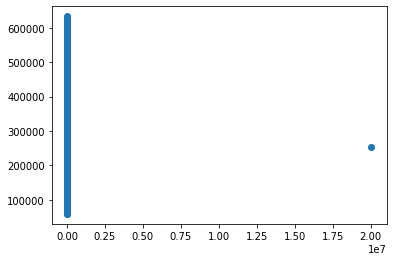

In [43]:
plt.scatter(df_train['HouseYear'], df_train['Price'])

In [44]:
df_train.loc[(df_train['HouseYear'] > 2020)| (df_train['HouseYear'] < 1500)] = df_train['HouseYear'].median()
df_test.loc[(df_test['HouseYear'] > 2020)| (df_train['HouseYear'] < 1500)] = df_train['HouseYear'].median()

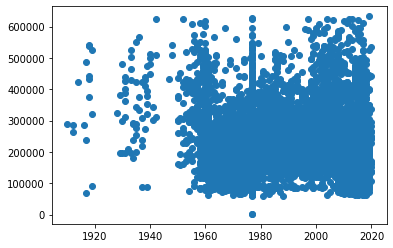

In [45]:
plt.scatter(df_train['HouseYear'], df_train['Price'])

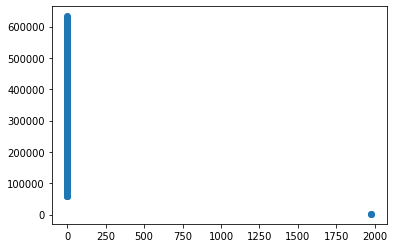

In [46]:
plt.scatter(df_train['Ecology_1'], df_train['Price'])

In [47]:
df_train.loc[(df_train['Ecology_1'] > 1800)] = df_train['Ecology_1'].median()
df_test.loc[(df_test['Ecology_1'] > 1800)] = df_train['Ecology_1'].median()

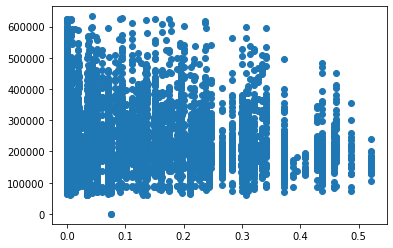

In [48]:
plt.scatter(df_train['Ecology_1'], df_train['Price'])

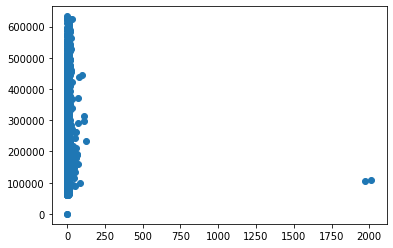

In [49]:
plt.scatter(df_train['KitchenSquare'], df_train['Price'])

In [50]:
df_train.loc[(df_train['KitchenSquare'] > 70) | (df_train['KitchenSquare'] == 0) 
             | (df_train['KitchenSquare'] > df_train['Square']), 'KitchenSquare'] = df_train['KitchenSquare'].median()
df_test.loc[(df_test['KitchenSquare'] > 70) | (df_test['KitchenSquare'] == 0)
            | (df_test['KitchenSquare'] > df_test['Square']), 'KitchenSquare'] = df_train['KitchenSquare'].median()

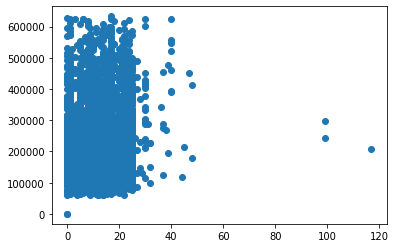

In [51]:
plt.scatter(df_train['HouseFloor'], df_train['Price'])

In [52]:
df_train.loc[(df_train['HouseFloor'] > 70) | (df_train['HouseFloor'] == 0), 'HouseFloor'] = df_train['HouseFloor'].median()
df_test.loc[(df_test['HouseFloor'] > 70) | (df_test['HouseFloor'] == 0), 'HouseFloor'] = df_train['HouseFloor'].median()

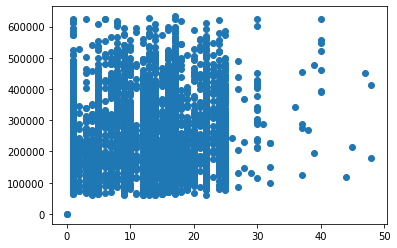

In [53]:
plt.scatter(df_train['HouseFloor'], df_train['Price'])

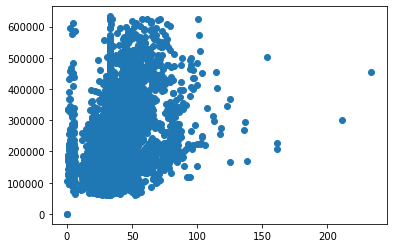

In [54]:
plt.scatter(df_train['LifeSquare'], df_train['Price'])

In [55]:
df_train.loc[(df_train['LifeSquare'] > 150) | (df_train['LifeSquare'] == 0), 'LifeSquare'] = df_train['LifeSquare'].median()
df_test.loc[(df_test['LifeSquare'] > 150) | (df_test['LifeSquare'] == 0), 'LifeSquare'] = df_train['LifeSquare'].median()

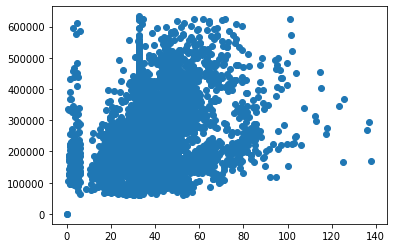

In [56]:
plt.scatter(df_train['LifeSquare'], df_train['Price'])

In [57]:
df_train.loc[(df_train['Square']) > (df_train['LifeSquare'] + df_train['KitchenSquare']), 'Square'] = df_train['Square'].median()
df_test.loc[(df_test['Square']) > (df_test['LifeSquare'] + df_test['KitchenSquare']), 'Square'] = df_train['Square'].median()

In [58]:
district_size = df_train['DistrictId'].value_counts().reset_index()\
            .rename(columns = {'index': 'Districtid', 'DistrictId': 'Districtsize'})

district_size

,Districtid,Districtsize
0,27.0,851
1,1.0,652
2,23.0,565
3,6.0,511
4,9.0,294
...,...,...
201,205.0,1
202,174.0,1
203,196.0,1
204,199.0,1


In [59]:
district_size.loc[district_size['Districtsize'] > 100, :]

,Districtid,Districtsize
0,27.0,851
1,1.0,652
2,23.0,565
3,6.0,511
4,9.0,294
5,62.0,247
6,30.0,228
7,58.0,179
8,53.0,174
9,21.0,165


обучаю через случайный лес

In [60]:
from sklearn.ensemble import RandomForestRegressor

In [61]:
X = df_train.drop(['Price', 'Ecology_2', 'Ecology_3', 'Shops_2'], axis=1)
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             10000 non-null  float64
 1   DistrictId     10000 non-null  float64
 2   Rooms          10000 non-null  float64
 3   Square         10000 non-null  float64
 4   LifeSquare     10000 non-null  float64
 5   KitchenSquare  10000 non-null  float64
 6   Floor          10000 non-null  float64
 7   HouseFloor     10000 non-null  float64
 8   HouseYear      10000 non-null  float64
 9   Ecology_1      10000 non-null  float64
 10  Social_1       10000 non-null  float64
 11  Social_2       10000 non-null  float64
 12  Social_3       10000 non-null  float64
 13  Healthcare_1   10000 non-null  float64
 14  Helthcare_2    10000 non-null  float64
 15  Shops_1        10000 non-null  float64
 16  Ecology_2_A    10000 non-null  float64
 17  Ecology_2_B    10000 non-null  float64
 18  Ecology

In [62]:
y = pd.DataFrame(df_train, columns=["Price"])

y.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Price   10000 non-null  float64
dtypes: float64(1)
memory usage: 78.2 KB


In [63]:
model = RandomForestRegressor(n_estimators = 1000, max_depth = 36, random_state = 42)
model.fit(X, y.values[:, 0])

RandomForestRegressor(max_depth=36, n_estimators=1000, random_state=42)

In [64]:
y_pred = model.predict(X)

y_pred.shape

(10000,)

In [65]:
check_test = pd.DataFrame({
    "y": y["Price"],
    "y_pred": y_pred
})

нахожу коофициент корреляции

In [66]:
r2f = r2_score(check_test["y_pred"], check_test["y"])
r2f

0.9518543576431073

In [67]:
y_pred.shape

(10000,)

In [68]:
print_preds(y, y_pred)

Train:	R2(r2_score) = 0.961	MAE = 11034.947


In [ ]:
kf = KFold(n_splits=3, random_state=42, shuffle=True)
cv_scores = cross_val_score(model, X, y, scoring='r2', n_jobs=-1)
print('R2(cross_val_score) = ', round(cv_scores.mean(), 3))

In [ ]:
X_test = df_test.drop(['Ecology_2', 'Ecology_3', 'Shops_2'], axis=1)
X.info()

In [ ]:
y_pred = model.predict(X_test)
y_pred[:10]

In [ ]:
preds = pd.DataFrame()   
preds['Id'] = X_test['Id']  
preds['Id'] = preds['Id'].astype(int)
preds['Price'] = y_pred   
preds.to_csv('SVoronkov_Course.csv', index=False)

In [ ]:
preds[:10]

In [ ]:
res_test = "SVoronkov_Course.csv"

In [ ]:
res_test = pd.read_csv(res_test)
res_test.info()

In [ ]:
feature_importances = pd.DataFrame(zip(*[X.columns], model.feature_importances_),
                                   columns=['feature_name', 'importance'])

feature_importances.sort_values(by='importance', ascending=False)